<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment8/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing PCA for Dimensionality Reduction
Dataset Used: Social Networking Ads Dataset on Kaggle

### Step 1: Understanding PCA

Before diving into the code, it's crucial to understand what PCA is and why it's used. PCA is a dimensionality reduction technique that transforms a set of possibly correlated variables into a set of linearly uncorrelated variables called principal components. This is achieved by identifying the directions (principal components) along which the variance in the data is maximized.

### Step 2: Setting Up the Environment

First, we'll set up our Python environment by importing the necessary libraries. We'll need `pandas` for data manipulation, `numpy` for numerical operations, and `sklearn` for applying PCA.

### Step 3: Loading the Data

We will load the Social Networks Ads dataset into our environment. Since you mentioned a live database connection, we'll simulate this by loading a static dataset first and then discuss how to adapt this to a live database connection.

### Step 4: Initial Data Exploration

Before applying PCA, it's important to understand the dataset. We'll look at the features available, check for missing values, and understand the data's structure.

### Step 5: Data Preprocessing

PCA requires numerical input. So, we'll convert categorical variables to numerical ones if needed, and standardize the data, as PCA is affected by scale.

### Step 6: Applying PCA

We'll apply PCA to the dataset using `sklearn` and select the number of components. The choice of the number of components is critical and can be based on the explained variance.


In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Social_Network_Ads.zip to Social_Network_Ads.zip


In [ ]:
# Step 2: Setting Up the Environment
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
import zipfile
import os

# File path for the uploaded zip file
zip_file_path = '/content/Social_Network_Ads.zip'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

# Finding the extracted file(s)
extracted_files = os.listdir("/content")
extracted_csv_files = [file for file in extracted_files if file.endswith('.csv')]

# Displaying the names of extracted files
extracted_csv_files


['Social_Network_Ads.csv']


#  Initial Data Exploration
We will explore the dataset to understand its distribution, check for missing values, and identify any necessary preprocessing steps.


In [ ]:
# Loading the dataset
file_path = '/content/Social_Network_Ads.csv'
df_social_ads = pd.read_csv(file_path)

# Initial Data Exploration
# Displaying the first few rows of the dataframe to understand its structure
df_social_ads_head = df_social_ads.head()

# Basic Descriptive Statistics
descriptive_stats_social_ads = df_social_ads.describe()

# Checking for Missing Values
missing_values_social_ads = df_social_ads.isnull().sum()

# Displaying the initial exploration results
df_social_ads_head, descriptive_stats_social_ads, missing_values_social_ads


(    User ID  Gender  Age  EstimatedSalary  Purchased
 0  15624510    Male   19            19000          0
 1  15810944    Male   35            20000          0
 2  15668575  Female   26            43000          0
 3  15603246  Female   27            57000          0
 4  15804002    Male   19            76000          0,
             User ID         Age  EstimatedSalary   Purchased
 count  4.000000e+02  400.000000       400.000000  400.000000
 mean   1.569154e+07   37.655000     69742.500000    0.357500
 std    7.165832e+04   10.482877     34096.960282    0.479864
 min    1.556669e+07   18.000000     15000.000000    0.000000
 25%    1.562676e+07   29.750000     43000.000000    0.000000
 50%    1.569434e+07   37.000000     70000.000000    0.000000
 75%    1.575036e+07   46.000000     88000.000000    1.000000
 max    1.581524e+07   60.000000    150000.000000    1.000000,
 User ID            0
 Gender             0
 Age                0
 EstimatedSalary    0
 Purchased          0
 dtype


#  Data Preprocessing
Since PCA requires numerical input and is sensitive to the scale of the data, we will standardize the features `Age` and `EstimatedSalary`.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 5: Data Preprocessing

# Dropping the 'User ID' column as it's not relevant for PCA
df_preprocessed = df_social_ads.drop('User ID', axis=1)

# Encoding the 'Gender' column into numerical format
label_encoder = LabelEncoder()
df_preprocessed['Gender'] = label_encoder.fit_transform(df_preprocessed['Gender'])

# Separating features and target variable
features = df_preprocessed.drop('Purchased', axis=1)
target = df_preprocessed['Purchased']

# Standardizing the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Displaying the first few rows of the preprocessed features
pd.DataFrame(features_standardized, columns=features.columns).head()


,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


# Applying PCA
We will then apply PCA to the standardized features.


In [ ]:
# Step 6: Applying PCA

# Applying PCA without specifying the number of components to observe the explained variance
pca = PCA()
pca.fit(features_standardized)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Preparing data for a plot of explained variance
n_components = list(range(1, len(explained_variance) + 1))

# Displaying the explained variance and cumulative explained variance
explained_variance, cumulative_explained_variance, n_components


(array([0.40008219, 0.31856284, 0.28135497]),
 array([0.40008219, 0.71864503, 1.        ]),
 [1, 2, 3])

### PCA Analysis Results:

#### Explained Variance by Principal Components:
1. **First Component**: Explains approximately 40.01% of the variance.
2. **Second Component**: Explains about 31.86% of the variance.
3. **Third Component**: Accounts for 28.14% of the variance.

#### Cumulative Explained Variance:
- **After 1 Component**: 40.01% of the total variance is explained.
- **After 2 Components**: Cumulatively, 71.86% of the variance is explained.
- **After 3 Components**: All the variance (100%) is explained.

### Observations:
- The first two components together explain a significant portion (71.86%) of the total variance.
- Adding the third component brings in the remaining variance.

# Visualizing PCA Results:
We can visualize the data in the reduced dimensionality space.

Shall we proceed with selecting the optimal number of components and visualizing the PCA results?

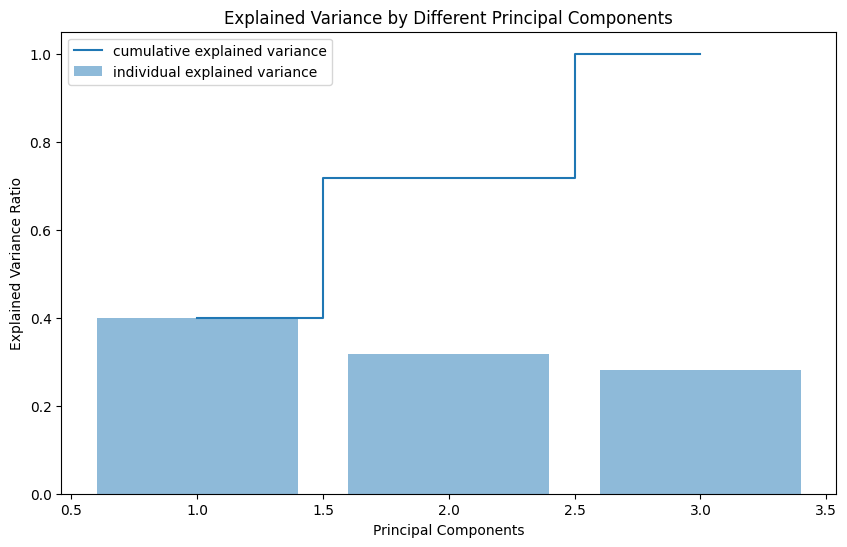

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the Explained Variance

# Creating a plot for the explained variance
plt.figure(figsize=(10, 6))
plt.bar(n_components, explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(n_components, cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Different Principal Components')
plt.legend(loc='best')
plt.show()


In [ ]:
# Applying PCA with the first two components
pca_2d = PCA(n_components=2)
features_pca_2d = pca_2d.fit_transform(features_standardized)

# Creating a DataFrame for the PCA results
df_pca_2d = pd.DataFrame(data=features_pca_2d, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_2d['Purchased'] = target  # Adding the target variable for visualization

# Displaying the first few rows of the transformed data
df_pca_2d.head()


,Principal Component 1,Principal Component 2,Purchased
0,-2.529709,-0.056084,0
1,-1.522671,0.334502,0
2,-0.795342,-1.439684,0
3,-0.474232,-1.269265,0
4,-1.473875,0.541042,0


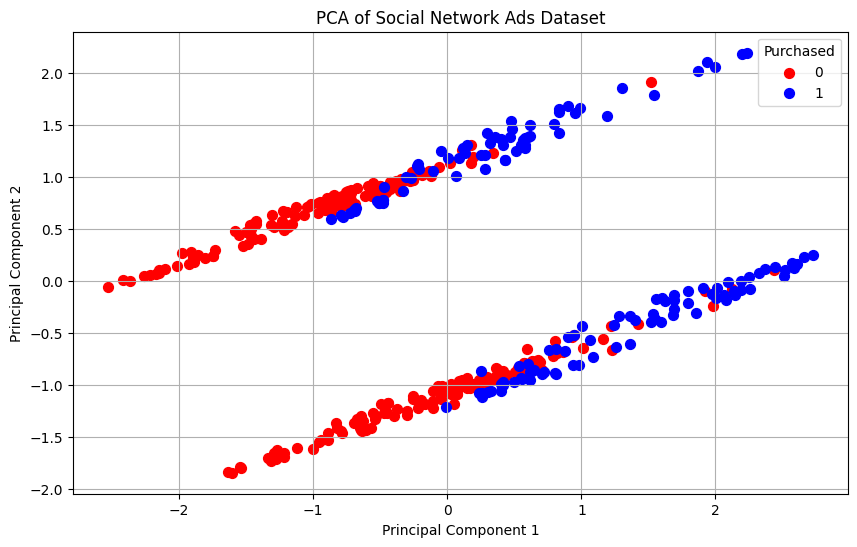

In [ ]:
# Visualizing the PCA Results

plt.figure(figsize=(10, 6))

# Scatter plot of the two principal components, colored by the 'Purchased' variable
colors = ['red', 'blue']
targets = [0, 1]

for target, color in zip(targets, colors):
    indices_to_keep = df_pca_2d['Purchased'] == target
    plt.scatter(df_pca_2d.loc[indices_to_keep, 'Principal Component 1'],
                df_pca_2d.loc[indices_to_keep, 'Principal Component 2'],
                c=color,
                s=50)

plt.title('PCA of Social Network Ads Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets, title='Purchased')
plt.grid()
plt.show()
